### In this project i will be using the titanic dataset and implement a Logistic Regression model and a Decision Tree Classifer to predict whether passengers survived or not and what are the most things that decided their fate by using some of the features against the target column (Survived)

### This dataset source was downloaded from https://www.kaggle.com/datasets/brendan45774/test-file

### Import the relevant modules

In [1]:
import pandas as pd
import numpy as np

### Load the data from csv file and check the first and last 5 rows

In [2]:
df = pd.read_csv("titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Check useful info about the dataset.
### From inspection we can see that there are 86 records in the age column are missing also 327 records in the cabin column are missing and 1 record in the Fare column is missing.
### Also the data type for Age should be an intger not a float

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Check summary statistics about the dataset

In [4]:
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


### Get rid of the columns that will not help in the prediction and show the changes

In [5]:
df = df.drop(columns = ["PassengerId", "Ticket", "Cabin", "Embarked", "Name"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875


### Rename the columns and show the changes

In [6]:
df.columns = ["Survived", "PassengerClass", "Gender", "Age", "Siblings_Spouses", "Parents_Children", "Fare"]
df.head()

,Survived,PassengerClass,Gender,Age,Siblings_Spouses,Parents_Children,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875


### Change the Gender column to numerical ( male = 1, female = 0) so we can be able to use this column in the prediction, also show the changes

In [7]:
series = pd.Series({"male": 1, "female": 0})
df["Gender"] = df["Gender"].map(series)
df.head()

,Survived,PassengerClass,Gender,Age,Siblings_Spouses,Parents_Children,Fare
0,0,3,1,34.5,0,0,7.8292
1,1,3,0,47.0,1,0,7.0000
2,0,2,1,62.0,0,0,9.6875
3,0,3,1,27.0,0,0,8.6625
4,1,3,0,22.0,1,1,12.2875


### Dealing with the missing data

In [8]:
df.describe()

,Survived,PassengerClass,Gender,Age,Siblings_Spouses,Parents_Children,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


### Import matplotlib to graph the columns with the missing data so we can see the distribution
### The histogram show that the age column is almost symmetric distribution the midian = to 27 and the mean = 30 , this means most of people who were on the titanic were between ages of 25 and 30

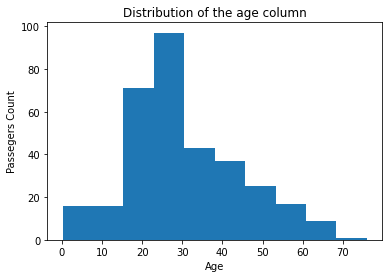

In [9]:
import matplotlib.pyplot as plt
plt.hist(df["Age"])
plt.xlabel("Age")
plt.ylabel("Passegers Count")
plt.title("Distribution of the age column")
plt.show()

### Fill the missing data in the Age column with the median value.

In [10]:
df["Age"] = df["Age"].fillna(27)
df["Age"].isna().sum()

0

### Show the only missing value in the Fare column

In [11]:
missing = df["Fare"].isna()
df.loc[missing]

,Survived,PassengerClass,Gender,Age,Siblings_Spouses,Parents_Children,Fare
152,0,3,1,60.5,0,0,NaN


### It shows the the missing value was for a 60 years old male with no parents, children, siblings or spouses and he was in 3rd class.
### So lets check the mean and the median Fare's value for the 3rd class and fill the missing value with the suitable one.

In [12]:
df.groupby(df["PassengerClass"]).Fare.agg(["mean", "median"])

,mean,median
PassengerClass,,
1,94.280297,60.0000
2,22.202104,15.7500
3,12.459678,7.8958


In [13]:
df["Fare"] = df["Fare"].fillna(12.459678)
df.isna().sum()

Survived            0
PassengerClass      0
Gender              0
Age                 0
Siblings_Spouses    0
Parents_Children    0
Fare                0
dtype: int64

### Now our dataset is ready for predictions, we will create the 2 arrays the predictors and the target

In [14]:
X = df[["PassengerClass", "Gender", "Age", "Siblings_Spouses", "Parents_Children", "Fare"]].values
y = df["Survived"].values

### But first we need to split our 2 arrays into training and testing sets, so we can be able to train the model and test it on new data that model hasn't seen yet 
### import train_test_split function from sklearn

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

### Import and build our Logistic Regression model and check its accuracy score.

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 101)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

1.0


### The model accuracy score is 1 this mean that the model predicted 100% of the data right which also mean we can now try to feed the model with new data and let the model predict whether it survived or not.

In [17]:
y_predict = model.predict(X_test)
print(y_test.shape)
print((y_predict == y_test).sum())


(126,)
126


In [18]:
df.head(1)

,Survived,PassengerClass,Gender,Age,Siblings_Spouses,Parents_Children,Fare
0,0,3,1,34.5,0,0,7.8292


### Create new datapoint with my information to predict if i was on the titanic, would i survive or not, and it showed that i didnt survive, which make sense, most of people who survived were females and children or paid high fare

In [19]:
new_passenger = [1, 1, 39, 1, 1, 30]
model.predict([new_passenger])

array([0], dtype=int64)

### But we cant rely on accuracy since it's only a good measure if our classes are evenly split, but it's very misleading if we have imbalanced classes.
### We will import the confusion matrix to check our true and false values.

In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[71  0]
 [ 0 55]]


### The confusion matrix showed that the true negative values are 71 and the true positive values are 55, 0 false negative and 0 false positive, meaning our model did great.
### Lets also check other metrics scores such as ( precision, recall, f1score).

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision", precision_score(y_test, y_predict))
print("recall", recall_score(y_test, y_predict))
print("f1", f1_score(y_test, y_predict))

precision 1.0
recall 1.0
f1 1.0


### From what we saw all the metrics score came out a 100%, thats great but what if we want to be more confident, after all we are using a threshold of 0.5 which is the default threshold in logistic regression, so how about we try and make this threshold 0.75.
### logistic regression doesn't only give prediction but it can also give a probability for the prediction, lets try that and see.

In [22]:
y_pred_proba = model.predict_proba(X_test)[:, 1] > 0.75
print("precision:", precision_score(y_test, y_pred_proba))
print("recall:", recall_score(y_test, y_pred_proba))


precision: 1.0
recall: 1.0


### Finally lets graph our false positives rate and true positives rate using a roc curve to be absolutely confident of our result.

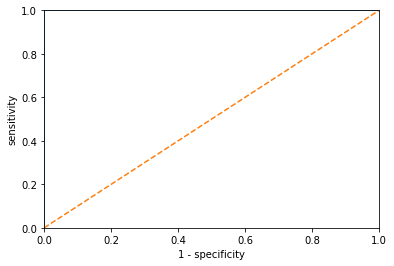

In [23]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

### We can see from the graph that there is no curve appearing at all which mean it stacked on the top axis of the figure which make sense cause our recall score was 1.0 and to prove that we make another graph with 0.1 bigger axis.

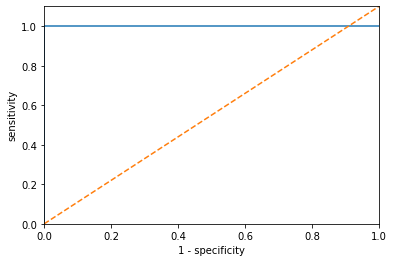

In [24]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1.1], linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.1])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

### We are sure that our model did a great job on this dataset but...
### Our dataset is fairly small and cause of that our test set is very small, So how can we judge our model on a small dataset, after all we are judging the model on only the test set but not the full dataset.
### Sklearn have a k-fold function for cross validiation, meaning it make sure that each datapoint in the dataset is used in the test set not only splitting randomly on the 30% of the data like train_test_split does.
### KFold  splited our dataset into 5 equally chunks, each chunk was used as the test set once and therefore we have 5 scores for each metric and they came back as 100%, if there were different  scores in each list then we would take their average value.

In [25]:
from sklearn.model_selection import KFold
scores = []
precisions = []
recalls = []
f1s = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression(solver = "liblinear")
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    scores.append(model.score(X_test, y_test))
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))
    f1s.append(f1_score(y_test, y_predict))
print("accuracies", scores)
print("precision", precisions)
print("recall", recalls)
print("f1", f1s)

accuracies [1.0, 1.0, 1.0, 1.0, 1.0]
precision [1.0, 1.0, 1.0, 1.0, 1.0]
recall [1.0, 1.0, 1.0, 1.0, 1.0]
f1 [1.0, 1.0, 1.0, 1.0, 1.0]


### Now we build the Decision Tree Classifier, first we import it from sklearn

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

### Decision Tree is a nonparametric machine learning algorithm its different from Logisitc Regression since it doesn't rely on the coefficients of the model to produce the prediction.
### I will be using a pruning technique called pre-pruning with 3 different methods to adjust the parameters
#### 1: Limiting the depth
#### 2: Avoiding leaves with few datapoints
#### 3: Limiting the number of leaf nodes
### To find the optimal values for these 3 methods i will have to import  GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

### To be able to use GridSearchCV we need to create a param_grid dictionary for the 3 methods to adjust the DecisionTree's parameters

In [28]:
param_grid = {"max_depth": [5, 15, 25], "min_samples_leaf": [1, 3], "max_leaf_nodes": [10, 20, 35, 50]}

### GridSearchCV has four parameters
#### 1: The DecisionTreeClassifier's model
#### 2: The param_grid we created
#### 3: the score metric ( accuracy, precision, recall, f1)
#### 4: How many folds for k-fold cross validation

In [29]:
gs = GridSearchCV(dt_model, param_grid, scoring = "f1", cv = 5)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 15, 25],
                         'max_leaf_nodes': [10, 20, 35, 50],
                         'min_samples_leaf': [1, 3]},
             scoring='f1')

### Then we check which are the optimal attributes from the param_grid

In [30]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}
1.0


### Now we are ready to build our Decision Tree Classifier with these attributes.

In [31]:
dt_model = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 10, min_samples_leaf = 1)
dt_model.fit(X, y)
y_predict = dt_model.predict(X)

print("precision score", precision_score(y, y_predict))
print("recall score", recall_score(y, y_predict))
print("f1 score", f1_score(y, y_predict))

precision score 1.0
recall score 1.0
f1 score 1.0


### Use the the new data that i created earlier on logistic regression model

In [32]:
print("Prediction:", dt_model.predict([new_passenger]))
print("Prediction probability:", dt_model.predict_proba([new_passenger]))

Prediction: [0]
Prediction probability: [[1. 0.]]


### Result is the same like before i still die on the titanic